# Business Problem:

### A company wants to improve its marketing strategies to increase the success rate of its campaigns. The company has historical data on customers' responses to previous marketing campaigns, along with various demographic and purchasing behavior attributes. The goal is to develop a predictive model that can accurately forecast whether a customer will respond positively to the company's marketing campaign based on their characteristics and past behavior.

# Objective:
### The objective is to build a machine learning model that can predict the likelihood of a customer accepting the offer in the current campaign, using the provided dataset. By accurately identifying customers who are more likely to respond positively, the company can optimize its marketing efforts, allocate resources more effectively, and potentially increase overall campaign success rates.

# Approach:

- Data Preprocessing: Clean the dataset, handle missing values, and encode categorical variables if necessary.
- Feature Engineering: Extract relevant features from the dataset or create new features that could potentially improve the model's predictive performance.
- Model Selection: Choose appropriate machine learning algorithms such as logistic regression, decision trees, random forests, or gradient boosting classifiers for binary classification tasks.
- Model Training: Split the dataset into training and testing sets, and train the selected models on the training data.
- Model Evaluation: Evaluate the performance of each model using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Hyperparameter Tuning: Fine-tune the hyperparameters of the best-performing model to further improve its performance.
- By addressing this business problem, the company can optimize its marketing campaigns, increase customer engagement, and ultimately drive revenue growth.


# DATA Explanation
## Data contains 2240 entries and 29 columns.
## Columns:
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
data = pd.read_csv('marketing_campaign.csv',delimiter=';')

In [3]:
pd.set_option('display.max_columns', None)
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Explore Dataset

In [4]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### There are 24 na values in Income column
### All the other data does not have missing values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


### The missing vallues are less than 0.1% of our dataset so dropping them won't impact results

In [7]:
data = data.dropna()

# Data Cleaning

### Changing Year_Birth column to Age column.

In [8]:
data['Year_Birth'] = datetime.datetime.now().year - data['Year_Birth']
data = data.rename(columns={'Year_Birth': 'Age'})

### Changing Dt_Customer from a date format to number of days since enroll.

In [9]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Dt_Customer'] = (datetime.datetime.now() - data['Dt_Customer']).dt.days

### Merging Kidhome and Teenhome columns into Children

In [10]:
data['Children'] = ((data['Kidhome'] != 0) & (data['Teenhome'] != 0)).astype(int)
data = data.drop(['Kidhome','Teenhome'],axis=1)

In [11]:
data = data[['ID', 'Age', 'Education', 'Marital_Status','Children', 'Income', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']]

In [12]:
data.describe()

,ID,Age,Children,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,55.179603,0.189079,52247.251354,3906.521209,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,0.391660,25173.076661,202.434667,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,28.000000,0.000000,1730.000000,3553.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,47.000000,0.000000,35303.000000,3733.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,54.000000,0.000000,51381.500000,3908.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,65.000000,0.000000,68522.000000,4082.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,131.000000,1.000000,666666.000000,4252.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Visualize data

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Dt_Customer'}>],
       [<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>,
        <Axes: title={'center': 'MntFishProducts'}>],
       [<Axes: title={'center': 'MntSweetProducts'}>,
        <Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>,
        <Axes: title={'center': 'NumWebPurchases'}>,
        <Axes: title={'center': 'NumCatalogPurchases'}>],
       [<Axes: title={'center': 'NumStorePurchases'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>,
        <Axes: title={'center': 'AcceptedCmp3'}>,
        <Axes: title={'center': 'AcceptedCmp4'}>,
        <Axes: title={'center': 'AcceptedCmp5'}>],
       [<Ax

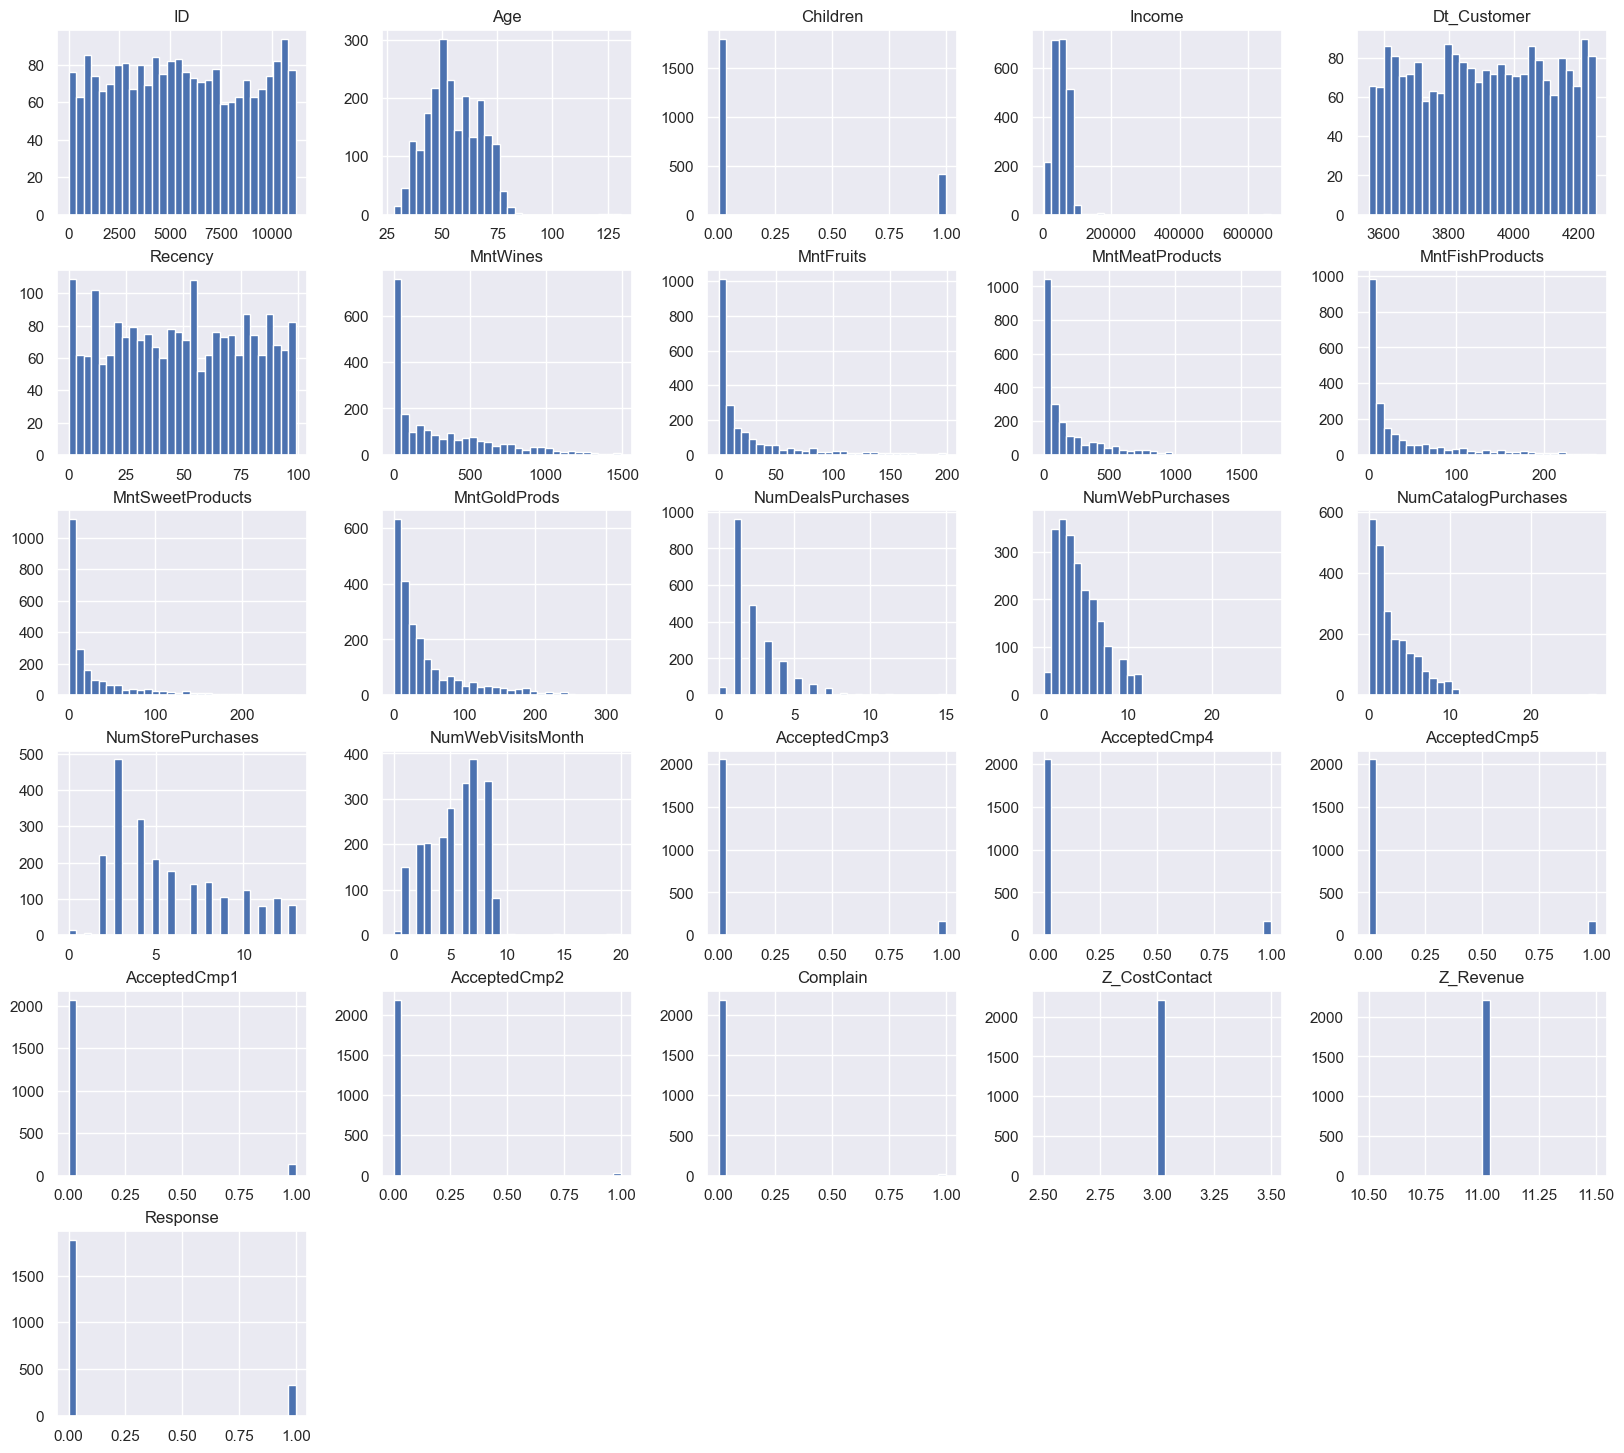

In [13]:
data.hist(bins=30,figsize=(20,18))

## There is a big gap on Income and Age columns which indicates there are outliers.

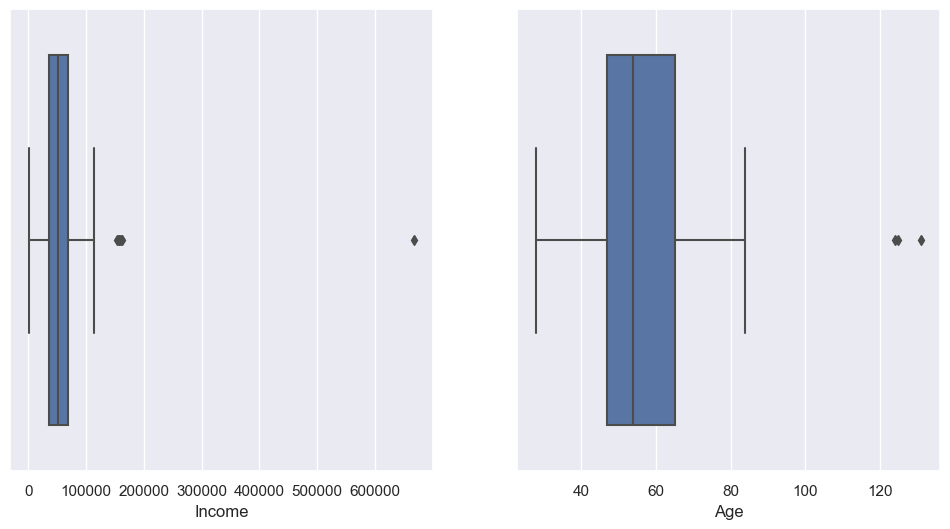

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Income'])
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Age'])
plt.show()

## We will get rid of 1% of each columns in our dataset and see if the problem is fixed

In [15]:
data = data[data['Income']<data['Income'].quantile(0.99)]
data = data[data['Age']<data['Age'].quantile(0.99)]

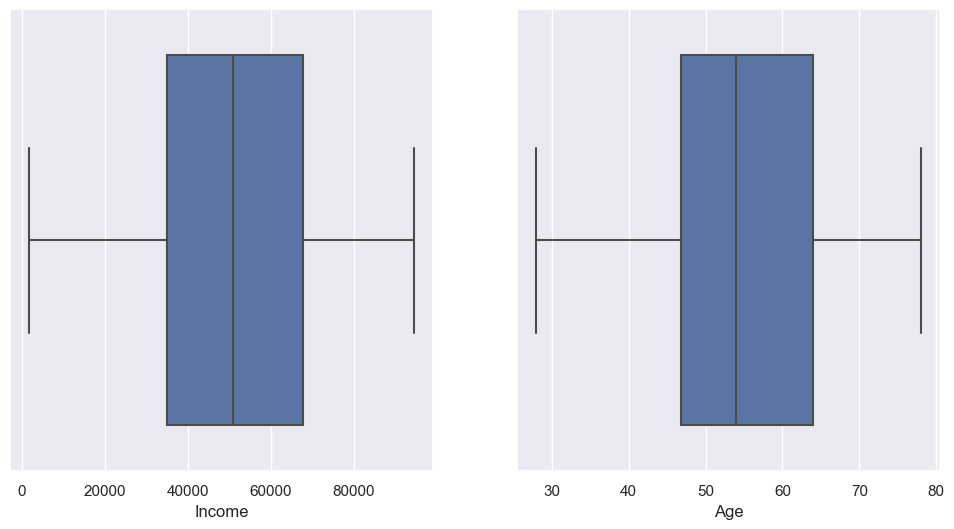

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Income'])
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Age'])
plt.show()

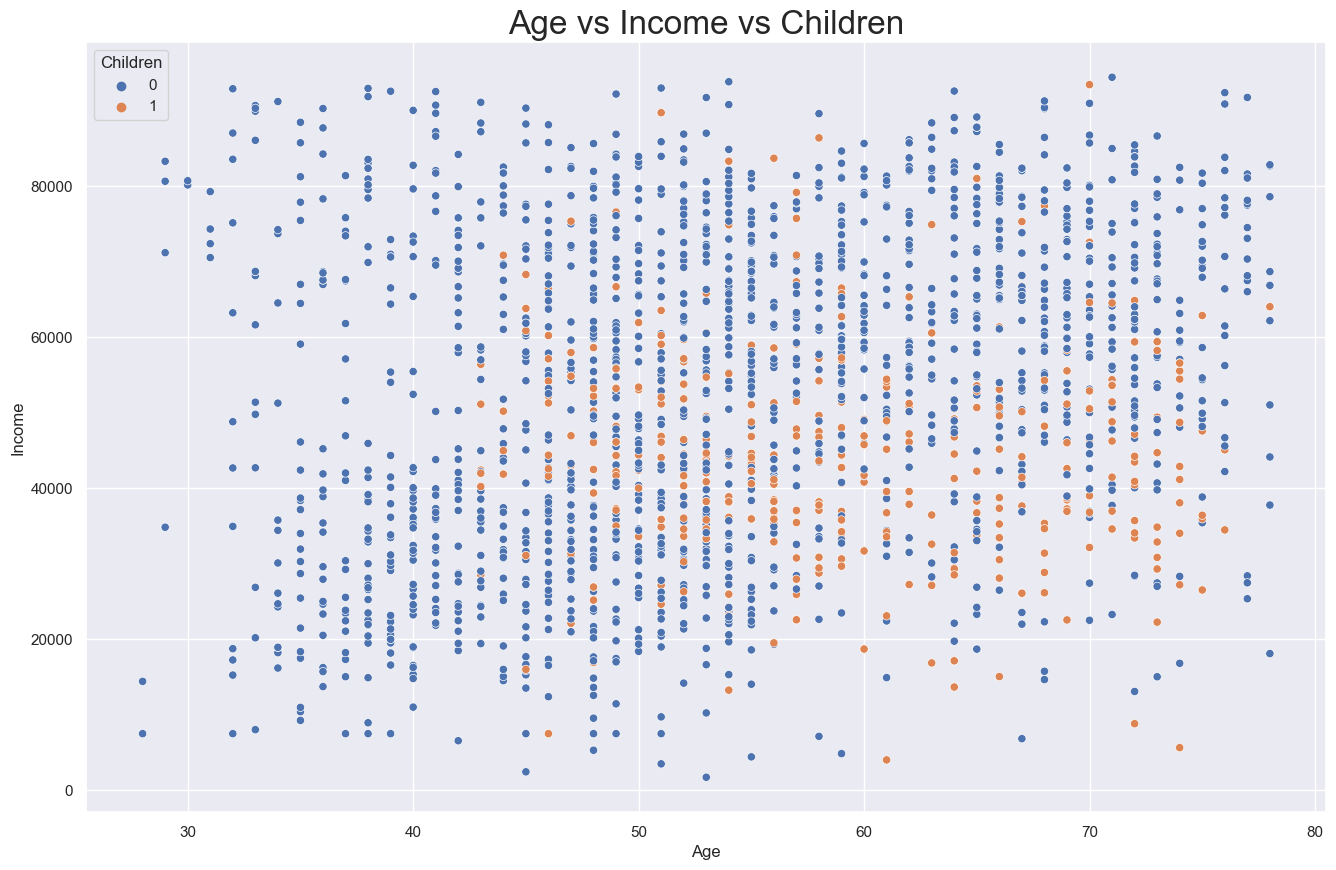

In [17]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=data['Age'], y=data['Income'], hue=data['Children'])
plt.title('Age vs Income vs Children',fontsize=24)
plt.show()

### As we can see from the above graph, based in the sample of our dataset:
- The parents are above 40 years old.
- The enrolled customers are in general above 30 years old

The number of : 0    2149
1      19
Name: Complain, dtype: int64


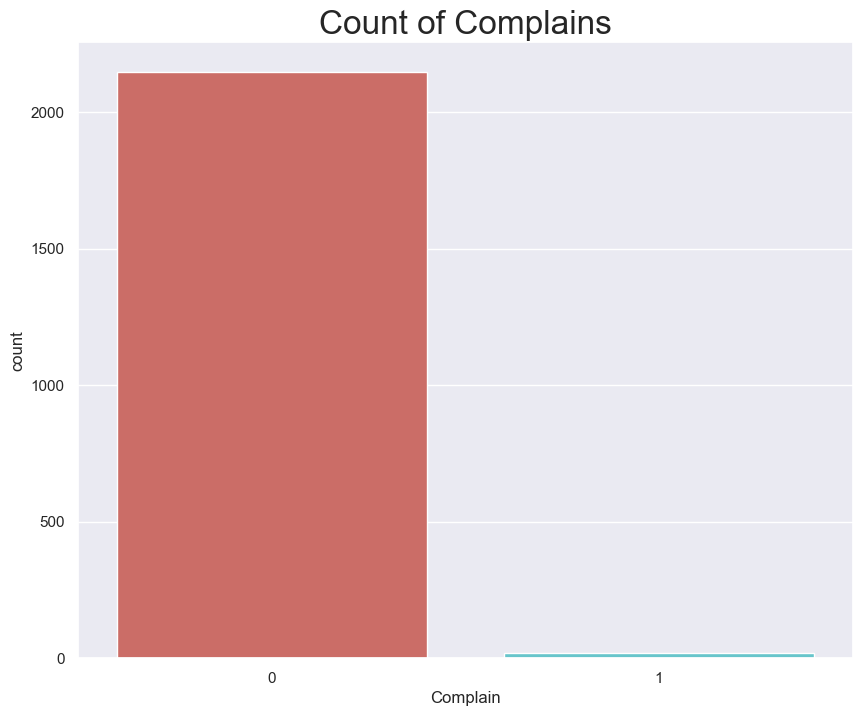

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(data,x=data['Complain'],palette='hls')
plt.title('Count of Complains', fontsize=24)
print("The number of :",data['Complain'].value_counts())

### Complain counts are low

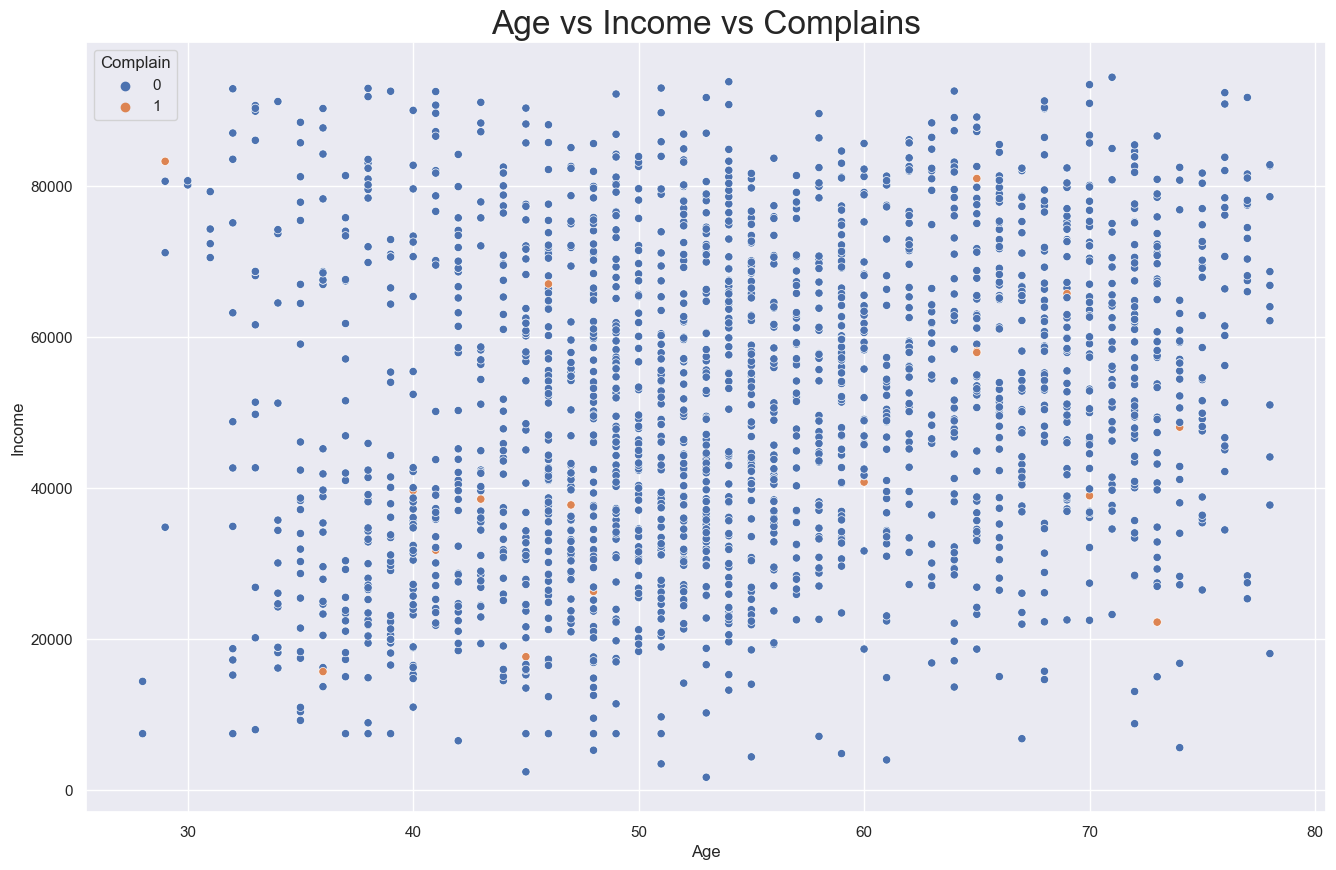

In [19]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=data['Age'], y=data['Income'], hue=data['Complain'])
plt.title('Age vs Income vs Complains',fontsize=24)
plt.show()

### Although the complains are low in number there are dispersed within the data set including income and age.

In [20]:
print('Marital_Status contains:')
for status in data['Marital_Status'].unique():
    print(f"- {status}")

Marital_Status contains:
- Single
- Together
- Married
- Divorced
- Widow
- Alone
- Absurd
- YOLO


### We will merge Alone,Absurd and YOLO to Single

In [21]:
data['Marital_Status'] = data['Marital_Status'].map({
    'Married':'Married',
    'Together':'Together',
    'Single':'Single',
    'Divorced':'Divorced',
    'Widow':'Widow',
    'Alone':'Single',
    'Absurd':'Single',
    'YOLO':'Single'
})

The number of : Married     841
Together    563
Single      465
Divorced    226
Widow        73
Name: Marital_Status, dtype: int64


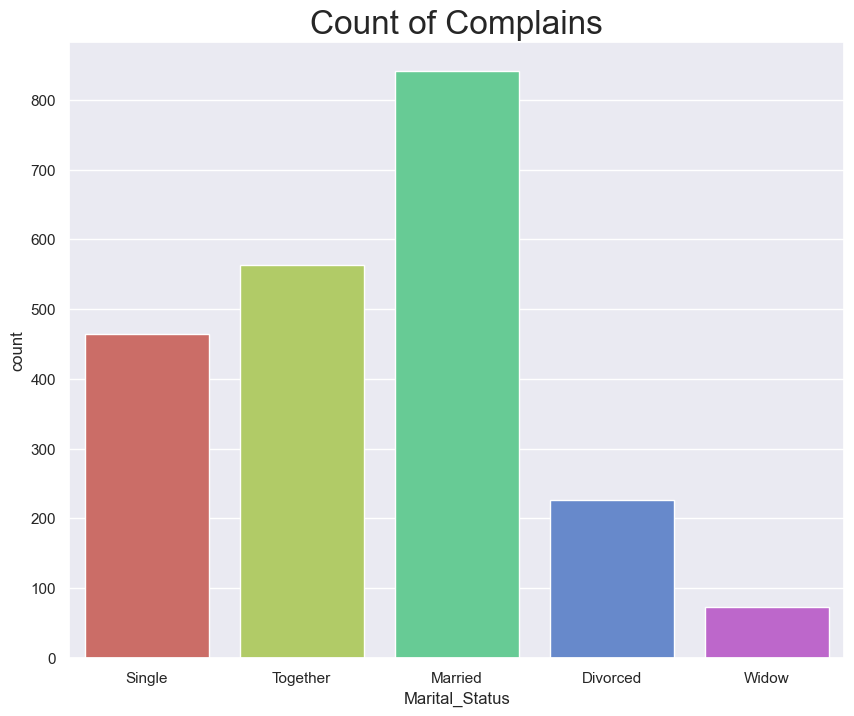

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(data,x=data['Marital_Status'],palette='hls')
plt.title('Count of Complains', fontsize=24)
print("The number of :",data['Marital_Status'].value_counts())

### Most enrolled customers are married.

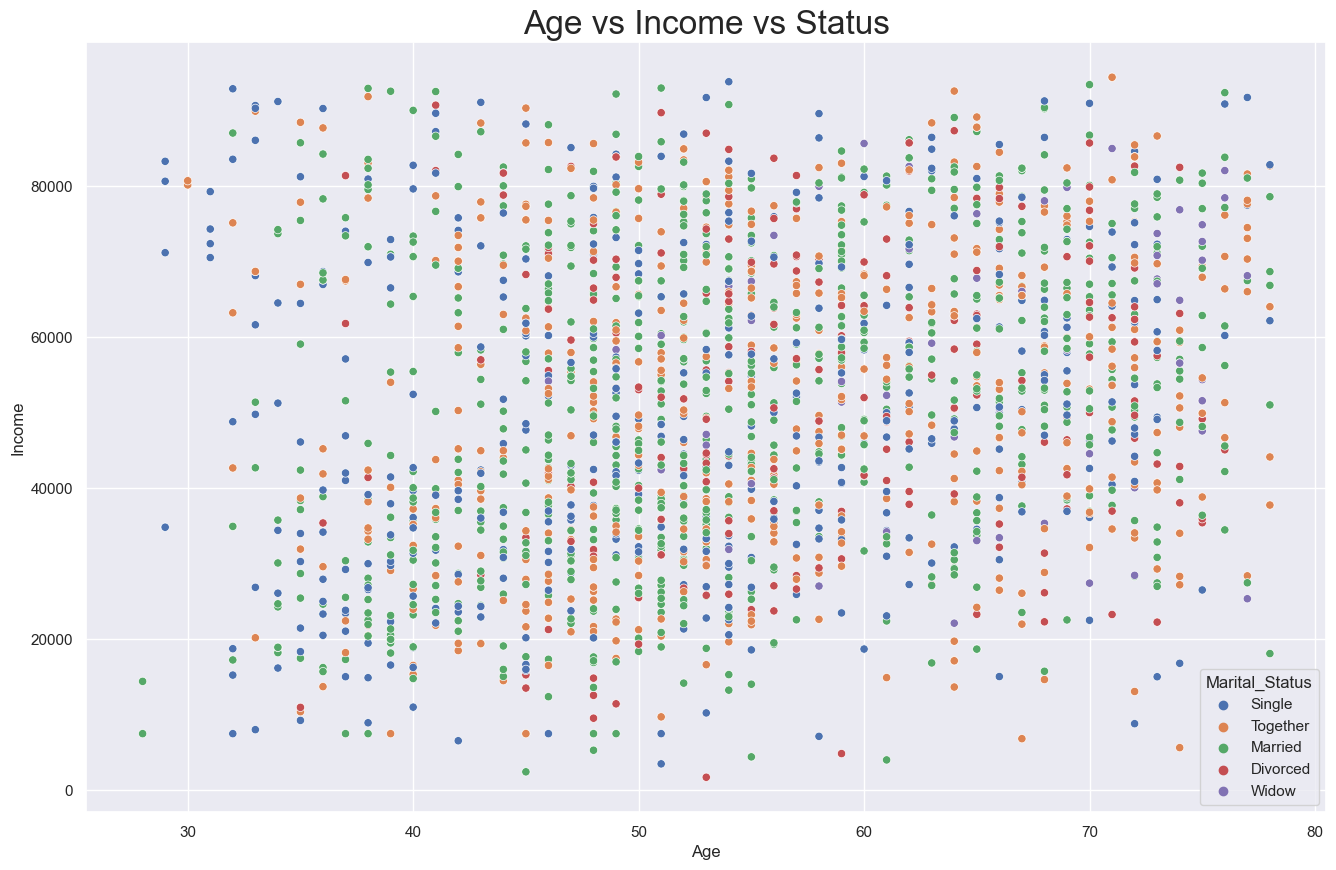

In [23]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=data['Age'], y=data['Income'], hue=data['Marital_Status'])
plt.title('Age vs Income vs Status',fontsize=24)
plt.show()

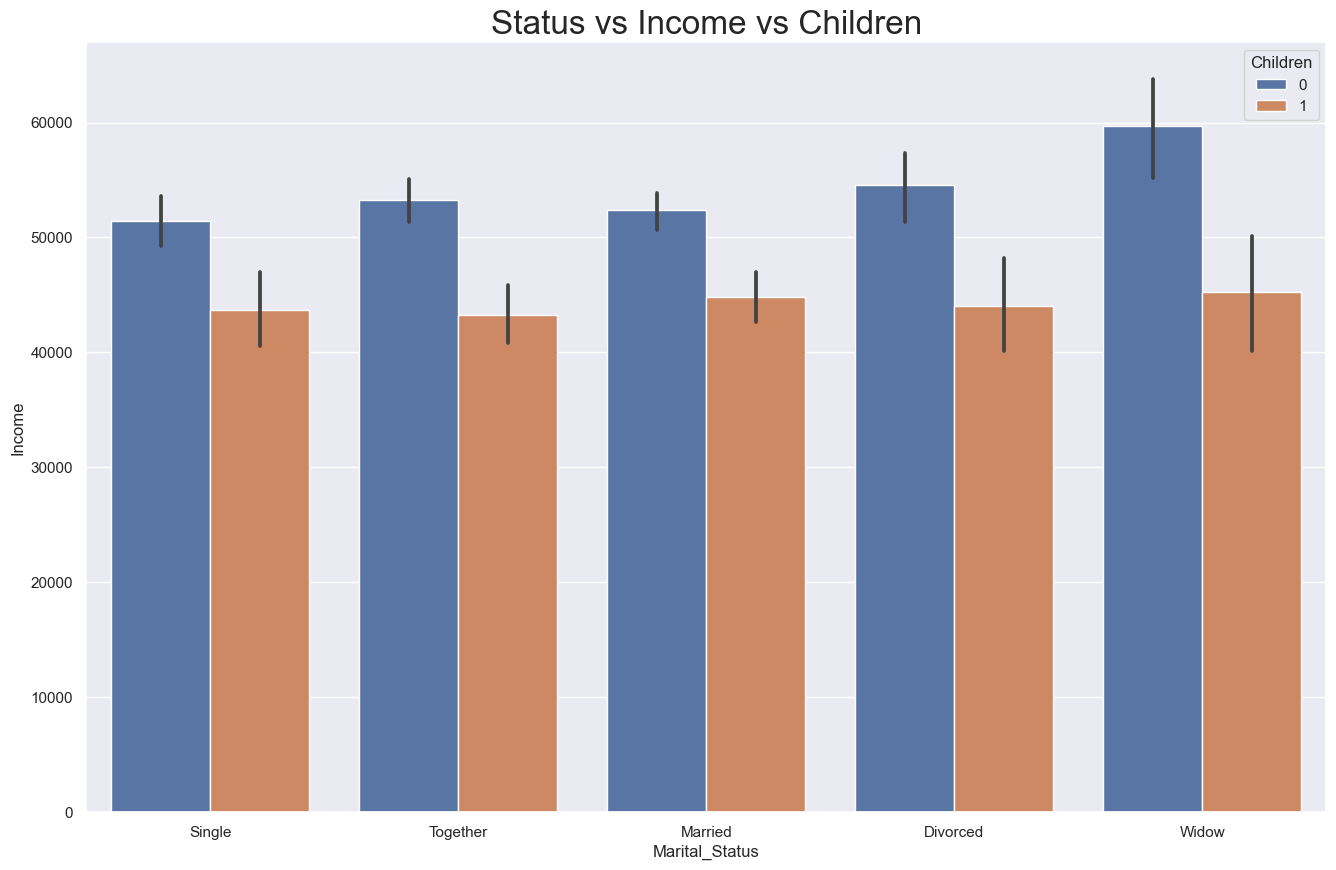

In [24]:
plt.figure(figsize=(16, 10))
sns.barplot(x=data['Marital_Status'], y=data['Income'], hue=data['Children'])
plt.title('Status vs Income vs Children',fontsize=24)
plt.show()

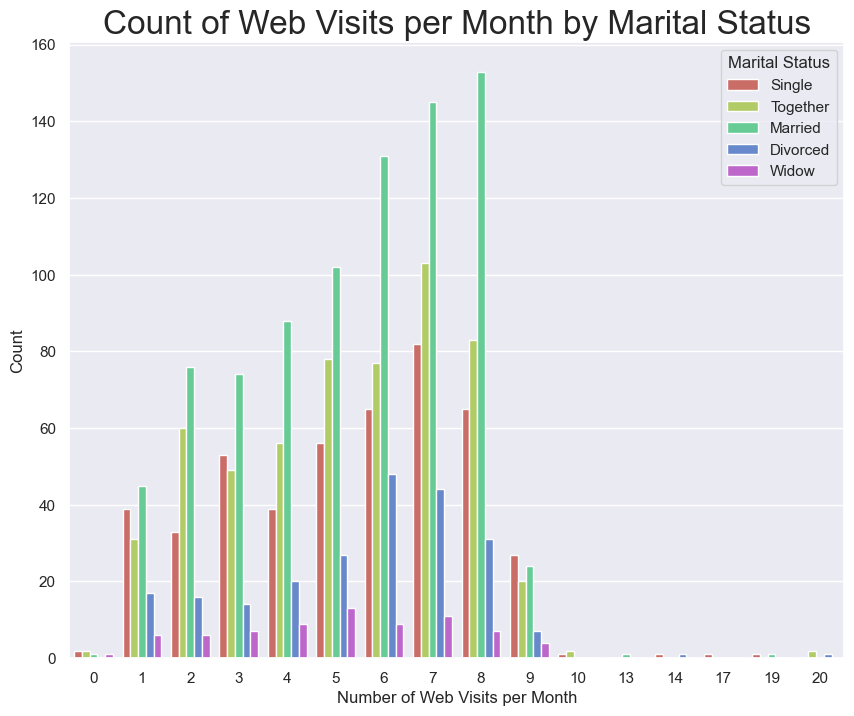

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(data=data, x='NumWebVisitsMonth', hue='Marital_Status', palette='hls')
plt.title('Count of Web Visits per Month by Marital Status', fontsize=24)
plt.xlabel('Number of Web Visits per Month')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.show()

### Most Web visits are done by Married people.

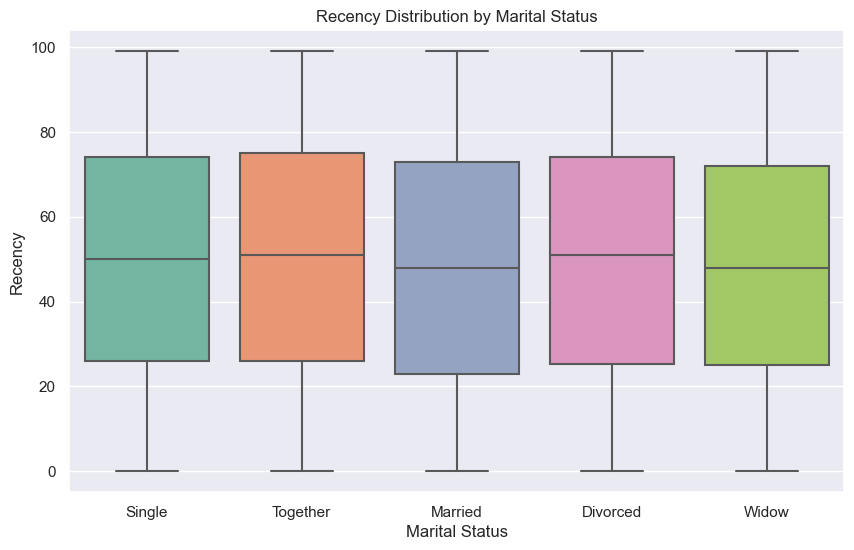

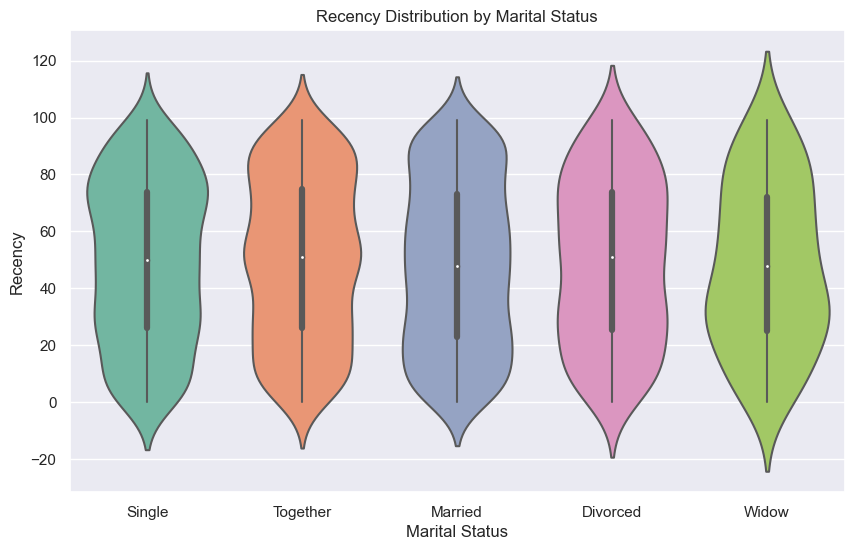

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='Recency', data=data, palette='Set2')
plt.title('Recency Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Recency')
plt.show()

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Marital_Status', y='Recency', data=data, palette='Set2')
plt.title('Recency Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Recency')
plt.show()

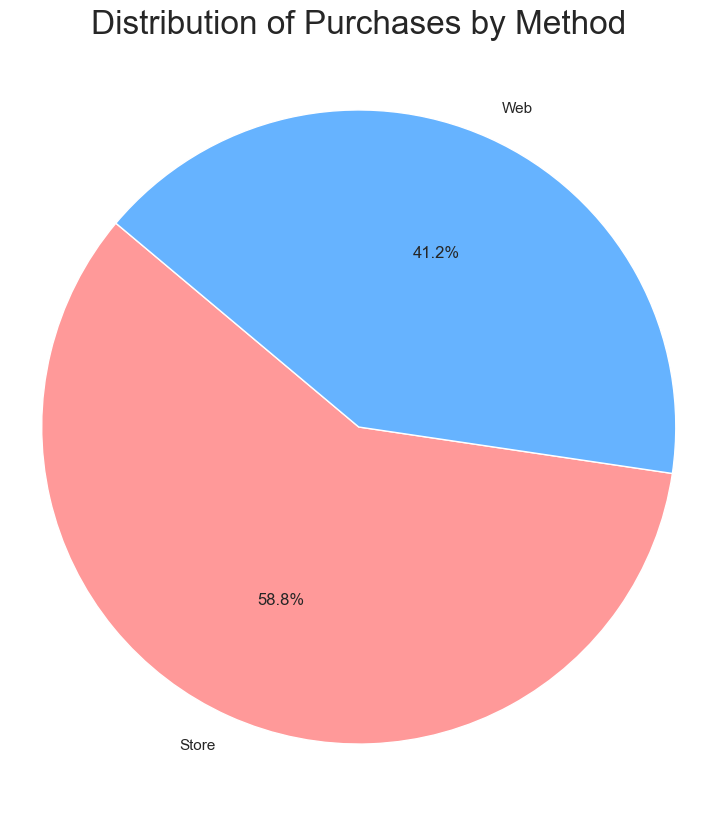

In [27]:
labels = ['Store', 'Web']
sizes = [
    data['NumStorePurchases'].sum(), 
    data['NumWebPurchases'].sum()
]
plt.figure(figsize=(9, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,colors=['#FF9999', '#66B3FF'])
plt.title('Distribution of Purchases by Method',fontsize=24)
plt.axis('equal')
plt.show()

## Most of the purchases are from store and then web

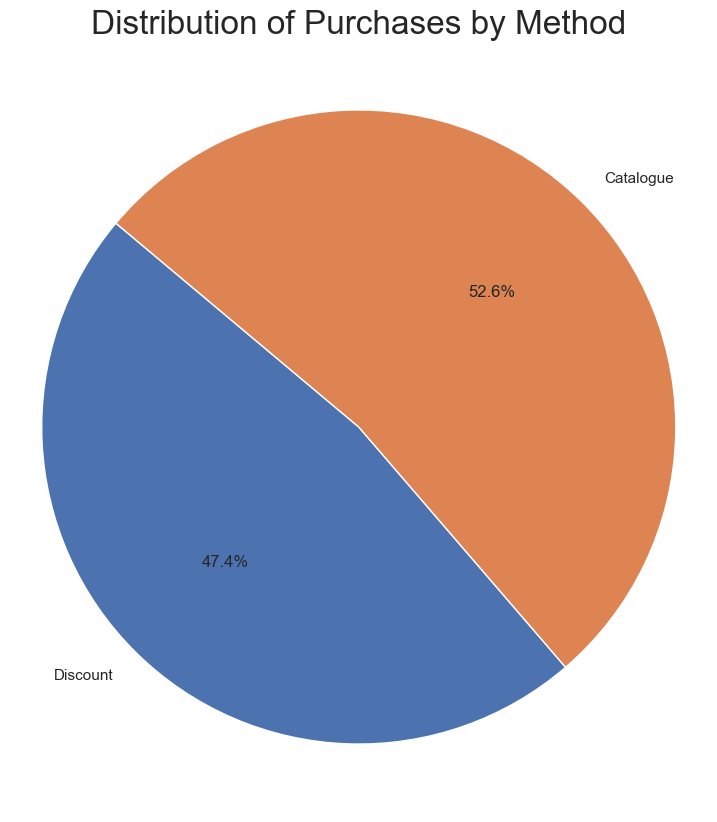

In [28]:
labels = ['Discount', 'Catalogue']
sizes = [
    data['NumDealsPurchases'].sum(), 
    data['NumCatalogPurchases'].sum(), 
]
plt.figure(figsize=(9, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchases by Method',fontsize=24)
plt.axis('equal')
plt.show()

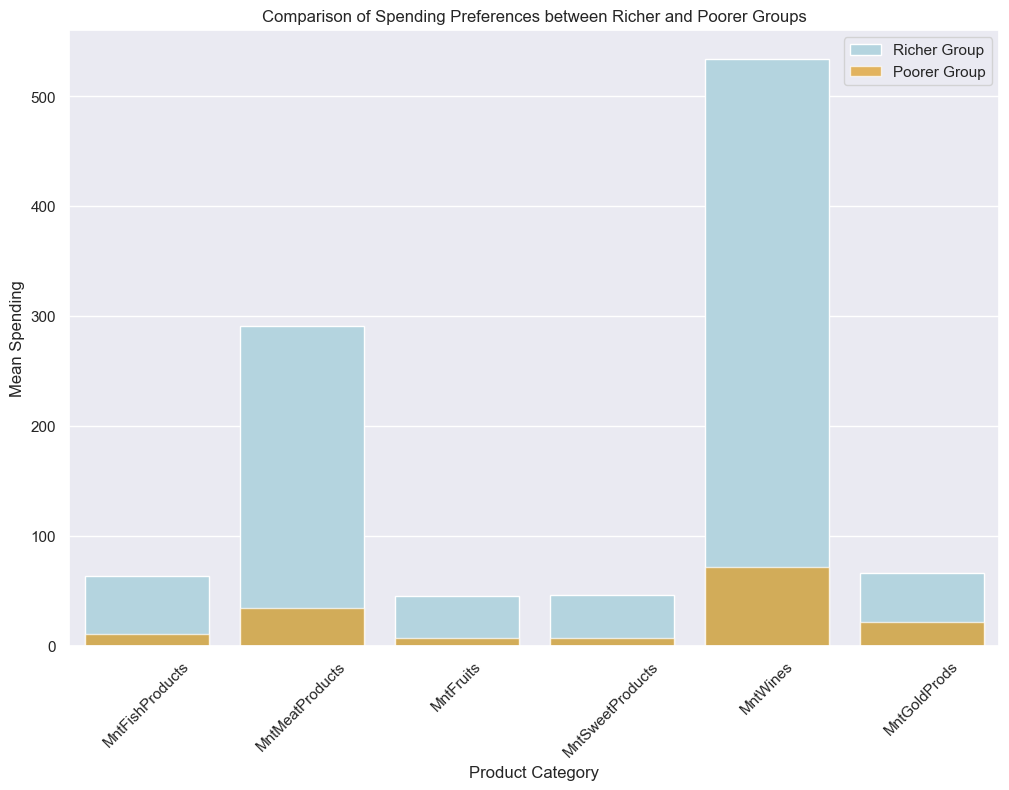

In [29]:
mean_income = data['Income'].mean()

richer_group = data[data['Income'] > mean_income]
poorer_group = data[data['Income'] <= mean_income]

mean_spending_richer = richer_group[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].mean()
mean_spending_poorer = poorer_group[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=mean_spending_richer.index, y=mean_spending_richer.values, color='lightblue', label='Richer Group')
sns.barplot(x=mean_spending_poorer.index, y=mean_spending_poorer.values, color='orange', alpha=0.7, label='Poorer Group')
plt.title('Comparison of Spending Preferences between Richer and Poorer Groups')
plt.xlabel('Product Category')
plt.ylabel('Mean Spending')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Preprocess

### We will merge our data on marital status as follows:
- 2 adults living together. Married and Together : 0
- 1 adult homes. Single, Divorced, Widow, Alone, Absurd, Yolo : 0

In [30]:
data['Marital_Status'] = data['Marital_Status'].map({
    'Married':0,
    'Together':0,
    'Single':1,
    'Divorced':1,
    'Widow':1,
    'Alone':1,
    'Absurd':1,
    'YOLO':1
})

### We will mask education levels

In [31]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [32]:
data['Education'] = data['Education'].map({
    'PhD':4,
    '2n Cycle':3,
    'Master':2,
    'Graduation':1,
    'Basic':0,
})

<Axes: >

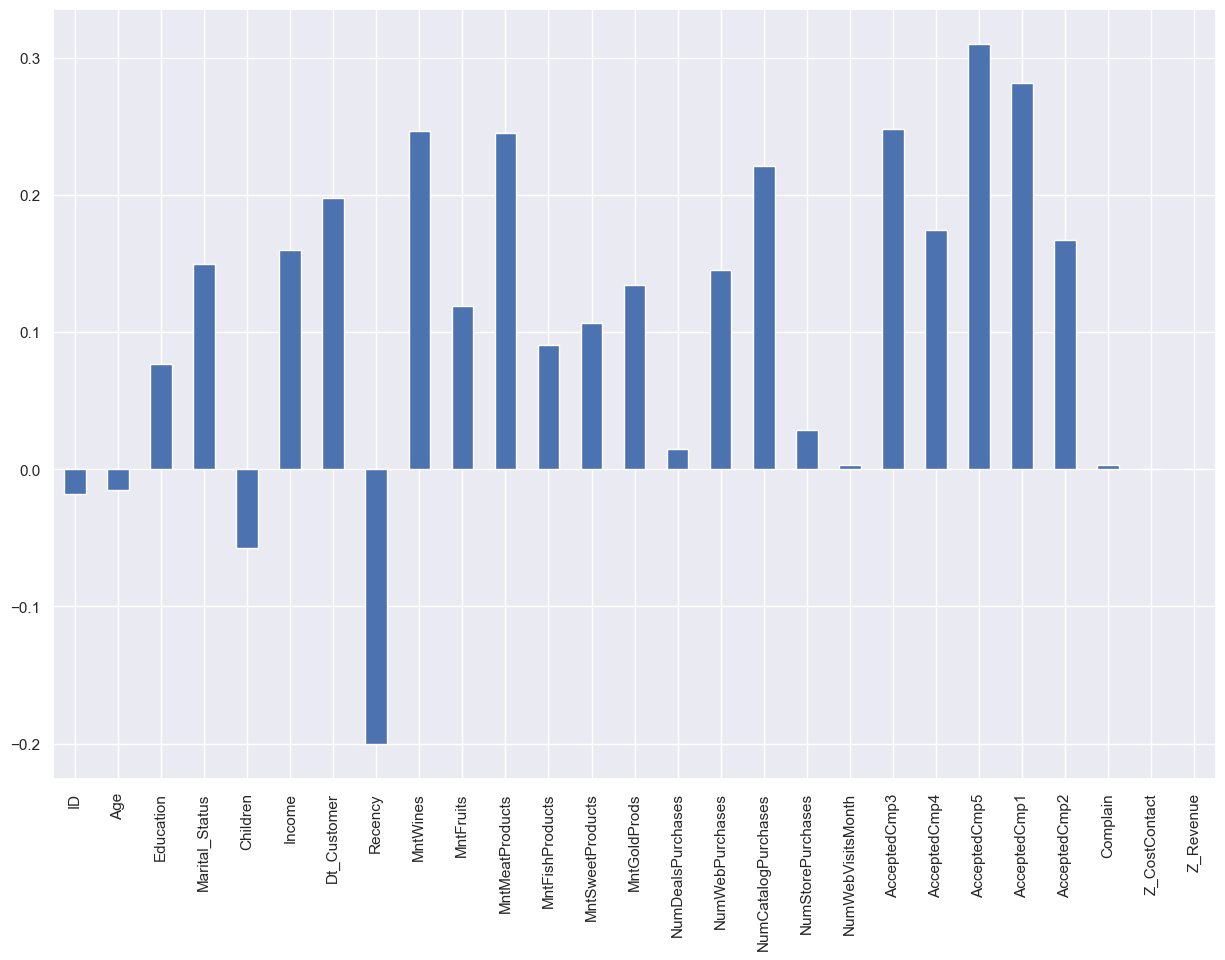

In [33]:
plt.figure(figsize=(15,10))
data.drop(['Response'],axis=1).corrwith(data['Response']).plot.bar()

### Based on correlation of features between Response column:
- The longer the time you shopped from the store the more less impacting is the marketing campaign.
- There is a strong correlation between meat and wine products with response.

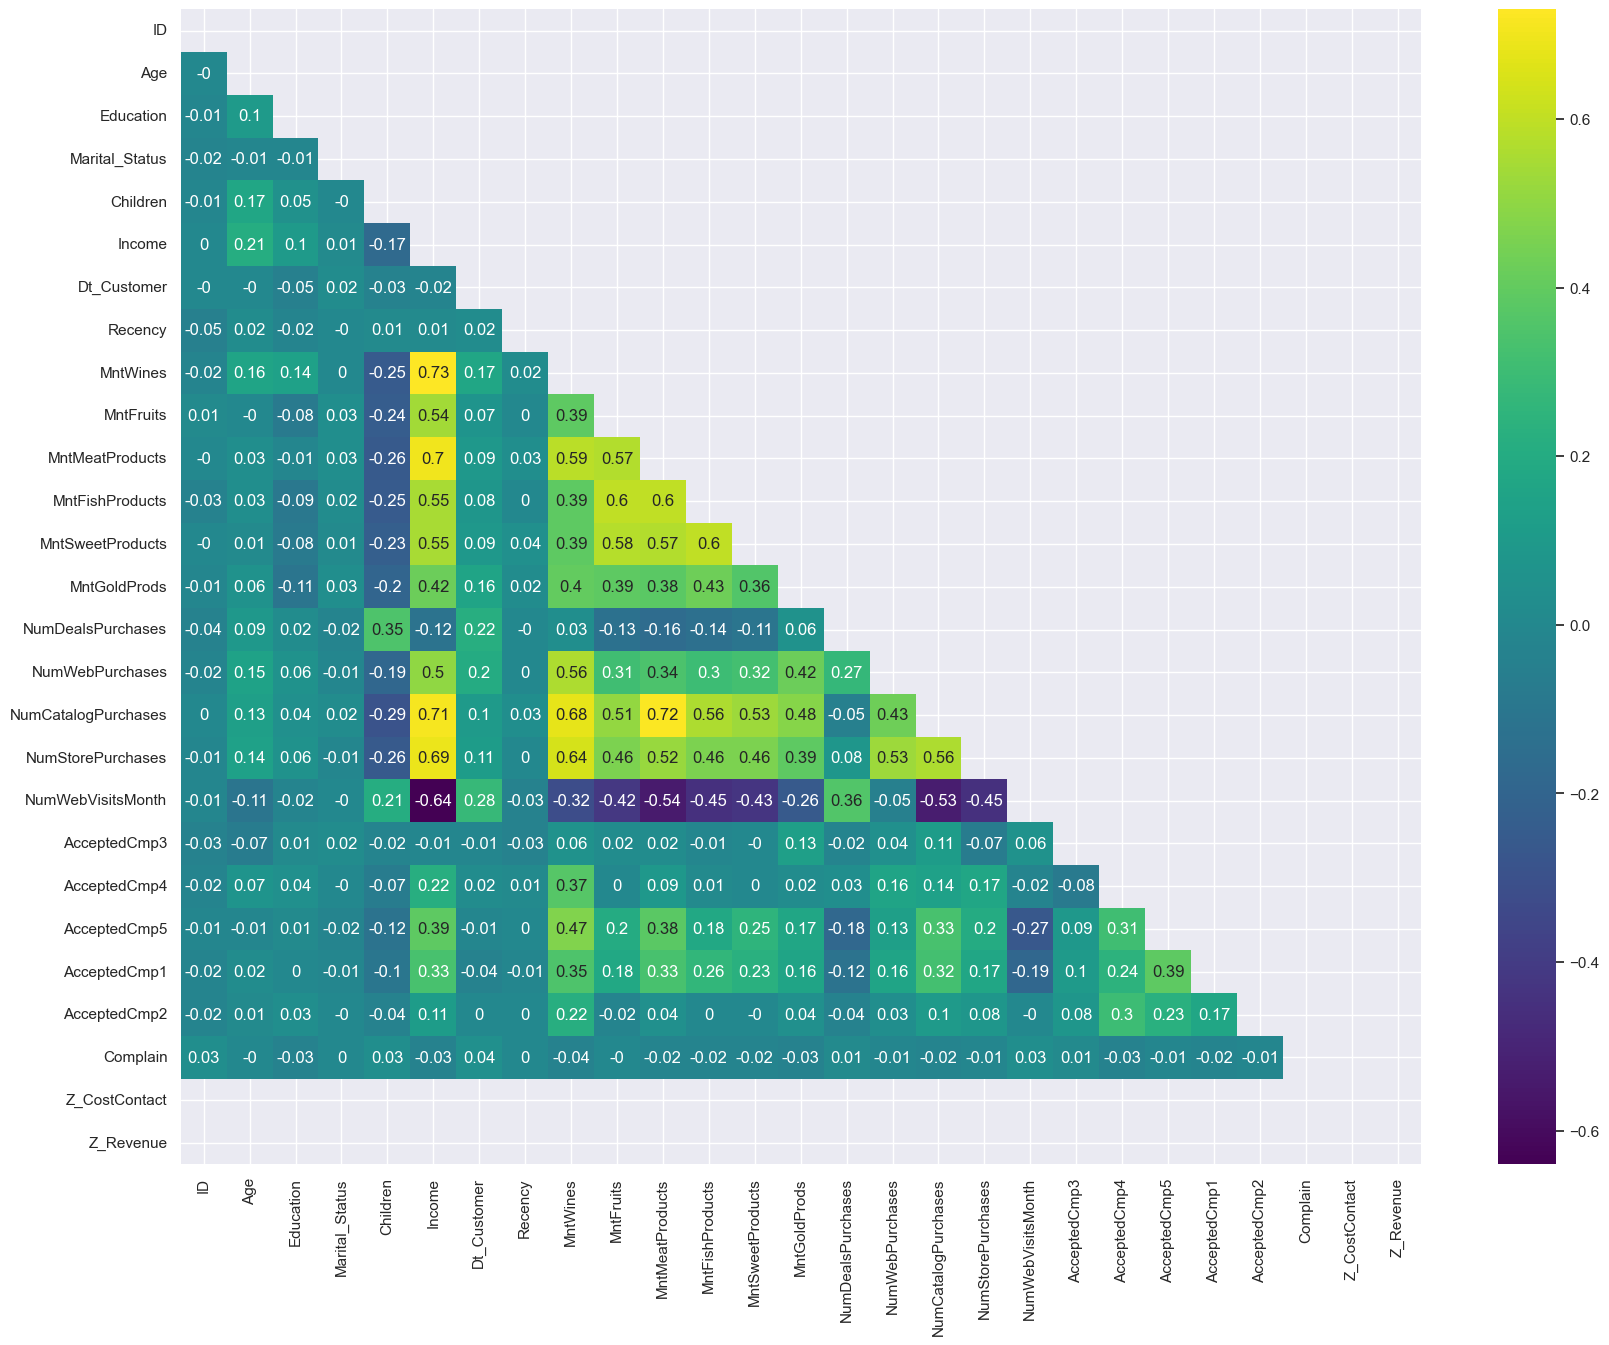

In [34]:
data_corr = data.drop(['Response'],axis=1)
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(data_corr.corr())).astype(bool)
sns.heatmap(data_corr.corr().round(2),annot=True,cmap='viridis',mask=mask)
plt.show()

In [35]:
data_id = data['ID']
data = data.drop(['Z_CostContact','Z_Revenue','ID'],axis=1)

## Label Encoding categorical data

In [36]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Age,Education,Marital_Status,Children,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,67,1,1,0,58138.0,4214,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,70,1,1,1,46344.0,3664,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,59,1,0,0,71613.0,3863,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,40,1,0,0,26646.0,3690,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,43,4,0,0,58293.0,3712,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [37]:
data['Response'].value_counts()

0    1850
1     318
Name: Response, dtype: int64

# Balancing dataset

## Breaking dataset according to response variable

In [38]:
data_response_0 = data.query('Response==0') 
data_response_1 = data.query('Response==1') 

## Resampling the data with 50/50 response variable

In [39]:
train_test_data = pd.concat([data_response_1,data_response_0.sample(len(data_response_1), random_state=42)])

## Shuffling new dataset

In [40]:
train_test_data = train_test_data.sample(frac=1, random_state=42)

In [41]:
train_test_data.shape

(636, 25)

# Split data

In [42]:
inputs = train_test_data.drop(['Response'], axis=1)
targets = train_test_data['Response']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

# Scale data

In [44]:
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train)
x_test2 = scaler.fit_transform(x_test)

In [45]:
x_train = pd.DataFrame(x_train2, columns=x_train.columns)
x_test = pd.DataFrame(x_test2, columns=x_test.columns)

# Model selection

## Linear Regression Model

In [46]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

Accuracy: 0.7421875 

Classification Report:
              precision    recall  f1-score   support

Not_Accepted       0.72      0.75      0.74        61
    Accepted       0.77      0.73      0.75        67

    accuracy                           0.74       128
   macro avg       0.74      0.74      0.74       128
weighted avg       0.74      0.74      0.74       128



<Axes: >

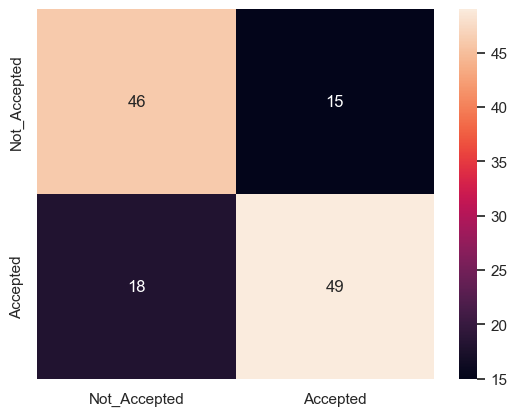

In [47]:
y_pred = reg.predict(x_test)
                    
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy,'\n')

print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Not_Accepted','Accepted']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,xticklabels=(['Not_Accepted','Accepted']),yticklabels=['Not_Accepted','Accepted'])

## Decision Tree Classifier

In [48]:
dtc =DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

Accuracy: 0.71875 

Classification Report:
              precision    recall  f1-score   support

Not_Accepted       0.69      0.75      0.72        61
    Accepted       0.75      0.69      0.72        67

    accuracy                           0.72       128
   macro avg       0.72      0.72      0.72       128
weighted avg       0.72      0.72      0.72       128



<Axes: >

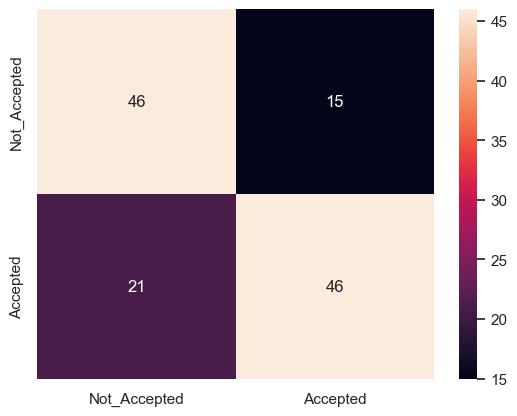

In [49]:
y_pred = dtc.predict(x_test)
                    
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy,'\n')

print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Not_Accepted','Accepted']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,xticklabels=(['Not_Accepted','Accepted']),yticklabels=['Not_Accepted','Accepted'])

## Support Vector Machines

In [50]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

Accuracy: 0.765625 

Classification Report:
              precision    recall  f1-score   support

Not_Accepted       0.76      0.74      0.75        61
    Accepted       0.77      0.79      0.78        67

    accuracy                           0.77       128
   macro avg       0.77      0.76      0.76       128
weighted avg       0.77      0.77      0.77       128



<Axes: >

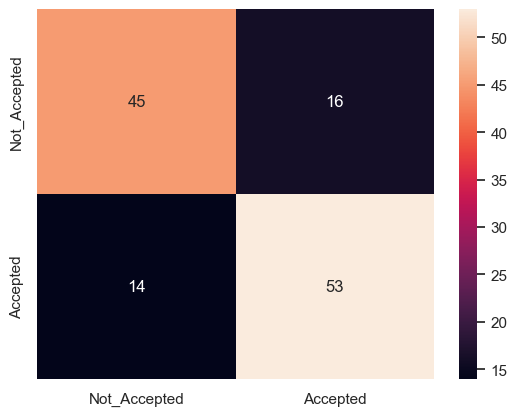

In [51]:
y_pred = svc.predict(x_test)
                    
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy,'\n')

print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Not_Accepted','Accepted']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,xticklabels=(['Not_Accepted','Accepted']),yticklabels=['Not_Accepted','Accepted'])

# SVM model was the best performing model

## Cross validation

In [52]:
accurancies = cross_val_score(estimator=svc,X=x_train,y=y_train,cv=10)
print('Model accuracy: %0.2f (+/- %0.2f)' % (accurancies.mean(), accurancies.std() * 2))

Model accuracy: 0.83 (+/- 0.05)


## Tuning the model

In [53]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [54]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True,verbose=1)

In [55]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=1)

In [56]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Accuracy: 0.7734375 

Classification Report:
              precision    recall  f1-score   support

Not_Accepted       0.76      0.77      0.76        61
    Accepted       0.79      0.78      0.78        67

    accuracy                           0.77       128
   macro avg       0.77      0.77      0.77       128
weighted avg       0.77      0.77      0.77       128



<Axes: >

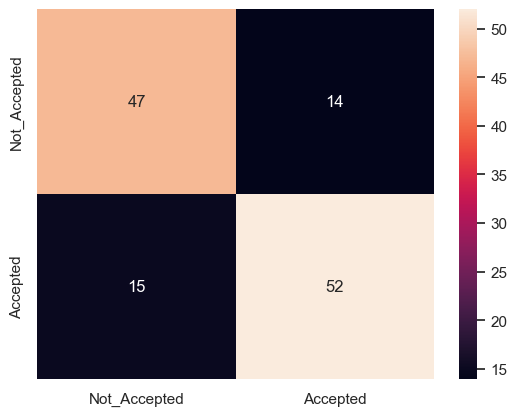

In [57]:
grid_pred  = grid.predict(x_test)
                    
accuracy = accuracy_score(y_test, grid_pred)
print("Accuracy:", accuracy,'\n')

print("Classification Report:")
print(classification_report(y_test, grid_pred,target_names=['Not_Accepted','Accepted']))

cm = confusion_matrix(y_test, grid_pred)
sns.heatmap(cm,annot=True,xticklabels=(['Not_Accepted','Accepted']),yticklabels=['Not_Accepted','Accepted'])

# References
## Dataset: Marketing Campaign
### Link: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign